 # Deep Learning Homework: Marvin 🐞

***
Jupiter Notebook programmcode and documentation for the subject Deep Learning

- **Name:** Johannes Müller
- **Matrikelnummer** 9530797
- **Hauptschwerpunkt:** Datenanalyse
- **Weiter Schwerpunkte:** Performance, Erklärbarkeit
- **Abgabedatum:** 22.12.2022
***
# Content:

## 🐞 Setup
## 🐞 Data analysis
## 🐞 Performance
## 🐞 Sumary of the Tutorials
## 🐞 Sources


## Setup

---
For the start, I'll set up a primary neuronal network, which will be used for some tests with the training dataset. After these tests, the focus will be to increase the Performance of the neuronal network. Because I liked how the network in the DeepDive Notebook was called Marvin, I kept that name for this project too.

<br>
<div>
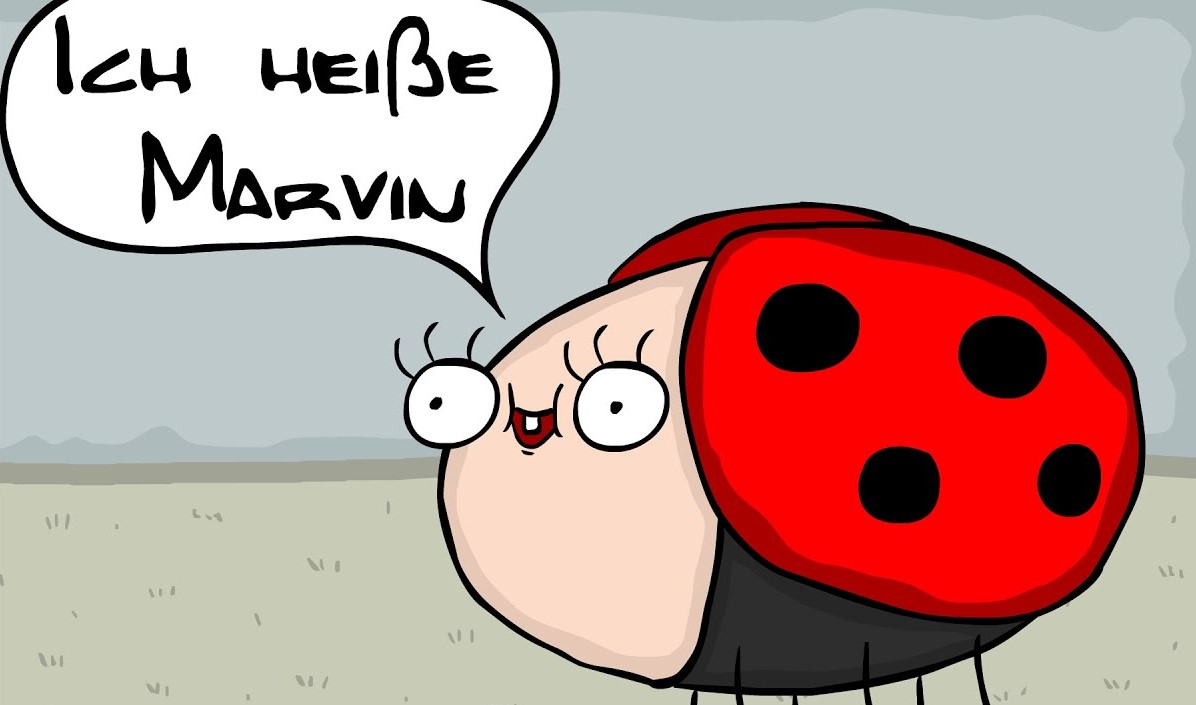
</div>
<br>
The first step is to import all necessary libraries, load the MNIST dataset and normalize the dataset.


In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import datetime
import os
import seaborn as sn

%reload_ext tensorboard


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def normalizing(x,y):
    x_normalized = x/255 
    y_normalized = y/255 

    x = x_normalized.reshape(-1, 28, 28, 1)
    y = y_normalized.reshape(-1, 28, 28, 1)
    return x, y

x_train, x_test = normalizing (x_train, x_test)


Afterward, the model of the neuronal network needs to be designed by adding a few different layers to the model. Also, the learning rate and optimizer are defined.

In [1]:
marvin = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(15)
])



marvin.summary()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()


NameError: name 'tf' is not defined

In [21]:

# preparing training routine
marvin.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# execute training

marvin.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/10
7500/7500 [==============================] - 15s 2ms/step - loss: 21.6127 - accuracy: 0.8815 - val_loss: 2.1014 - val_accuracy: 0.9466
Epoch 2/10
7500/7500 [==============================] - 14s 2ms/step - loss: 1.8037 - accuracy: 0.9250 - val_loss: 0.4816 - val_accuracy: 0.9631
Epoch 3/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.5156 - accuracy: 0.9424 - val_loss: 0.2517 - val_accuracy: 0.9681
Epoch 4/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2746 - accuracy: 0.9524 - val_loss: 0.1906 - val_accuracy: 0.9711
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1922 - accuracy: 0.9576 - val_loss: 0.1674 - val_accuracy: 0.9709
Epoch 6/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1604 - accuracy: 0.9626 - val_loss: 0.1480 - val_accuracy: 0.9755
Epoch 7/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1380 - accuracy: 0.9648 - val_loss: 0.1418 - val_a

After training Marvin 🐞 for the first time, I'll save the results as "first_test" and take a look at the first results.

<br>
<div>
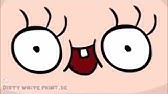
</div>
<br>

In [22]:
model_name = "first_test"
marvin.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, "> Time to check them out")

Success! Marvins results have been saved as: < first_test > Time to check them out


For the analysis of these results, they should be visualized with the help of a matrix, which shows the correct and wrong guesses. 

313/313 [==============================] - 0s 1ms/step


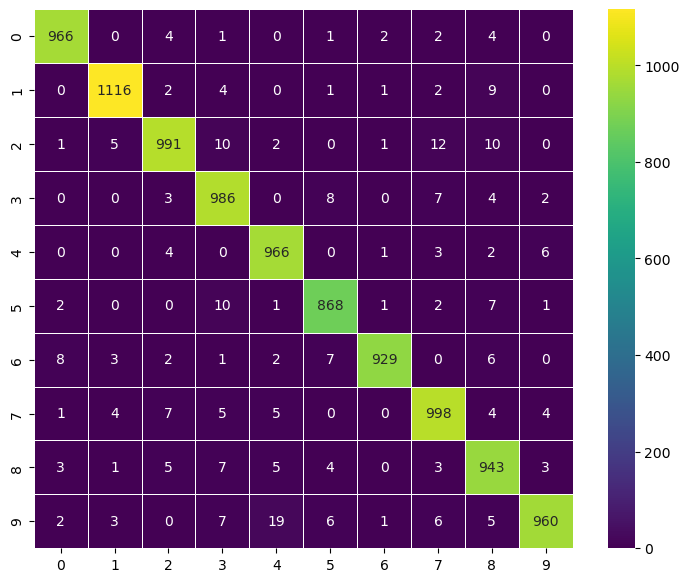

In [23]:

model_name = 'first_test'
marvin_reloaded = tf.keras.models.load_model(model_name)

predictions = marvin_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)


confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()



## Data anlysis

---

Marvin 🐞 is now operational and the training results are easy to visualize. It can be seen that the network can detect the number one best. On the other side number 5 is recognized as the worst, as the network often confuses 5 with 2, 6, and 8. But what happens, if Marvin 🐞 is trained without the best or worst recognized number in the training data set? My prediction would be, that the network would still detect number one quite clearly because it can detect it the best. The number 5 on the other hand should have even worse results. 
<br>
To test these cases, special training sets need to be generated and trained with. 


In [24]:
# removing function for a specific digit
def remove(number, x, y):
    idx = (y != number).nonzero()
    return x[idx], y[idx]
#Dataset without 1
(x_train_1, y_train_1), (x_test_1, y_test_1) = tf.keras.datasets.mnist.load_data()
x_no_one, y_no_one = remove(1, x_train, y_train)
x_no_one, x_test_1 = normalizing (x_no_one, x_test_1)

#Dataset without 5
(x_train_5, y_train_5), (x_test_5, y_test_5) = tf.keras.datasets.mnist.load_data()
x_no_5, y_no_5 = remove(5, x_train, y_train)
x_no_5, x_test_5 = normalizing (x_no_5, x_test_5)

# preparing training routine
marvin.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# execute and save results from the training without 1 (no one 😅)

marvin.fit(
    x_no_one,
    y_no_one,
    epochs=10,
    batch_size=8,
    validation_data=(x_test_1, y_test_1),
    callbacks=[tensorboard_callback]
)

model_name = "no_one"
marvin.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, ">")

# execute and save results from the training without 5

marvin.fit(
    x_no_5,
    y_no_5,
    epochs=10,
    batch_size=8,
    validation_data=(x_test_5, y_test_5),
    callbacks=[tensorboard_callback]
)

model_name = "no_five"
marvin.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, ">")

Epoch 1/10
6658/6658 [==============================] - 14s 2ms/step - loss: 1.2568 - accuracy: 0.6145 - val_loss: 86.3430 - val_accuracy: 0.6969
Epoch 2/10
6658/6658 [==============================] - 14s 2ms/step - loss: 0.6711 - accuracy: 0.7962 - val_loss: 133.0458 - val_accuracy: 0.7420
Epoch 3/10
6658/6658 [==============================] - 13s 2ms/step - loss: 0.5470 - accuracy: 0.8328 - val_loss: 163.8353 - val_accuracy: 0.7612
Epoch 4/10
6658/6658 [==============================] - 13s 2ms/step - loss: 0.4869 - accuracy: 0.8500 - val_loss: 173.9227 - val_accuracy: 0.7717
Epoch 5/10
6658/6658 [==============================] - 13s 2ms/step - loss: 0.4501 - accuracy: 0.8609 - val_loss: 179.2484 - val_accuracy: 0.7811
Epoch 6/10
6658/6658 [==============================] - 14s 2ms/step - loss: 0.4298 - accuracy: 0.8683 - val_loss: 177.7728 - val_accuracy: 0.7868
Epoch 7/10
6658/6658 [==============================] - 14s 2ms/step - loss: 0.4081 - accuracy: 0.8759 - val_loss: 181.

To my surprise, it turned out exactly the other way than expected. The Dataset without number 5 even had slightly better accuracy than the dataset without number one, even though in the regular set number 1 was detected best. 

313/313 [==============================] - 0s 1ms/step


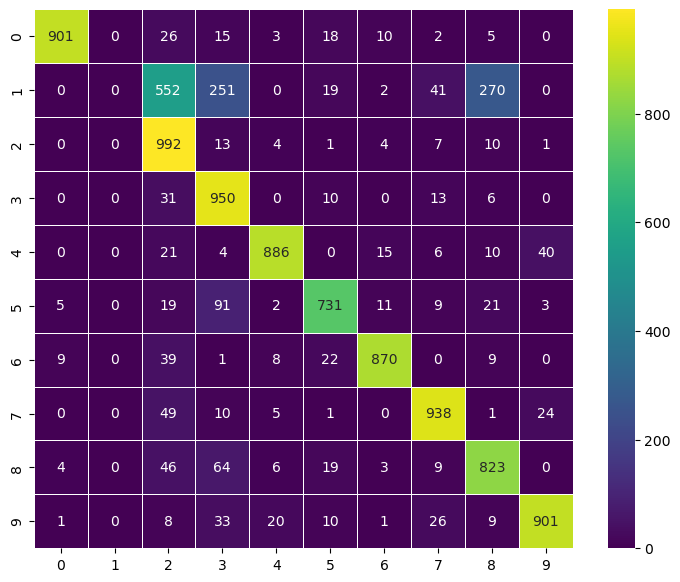

313/313 [==============================] - 0s 1ms/step


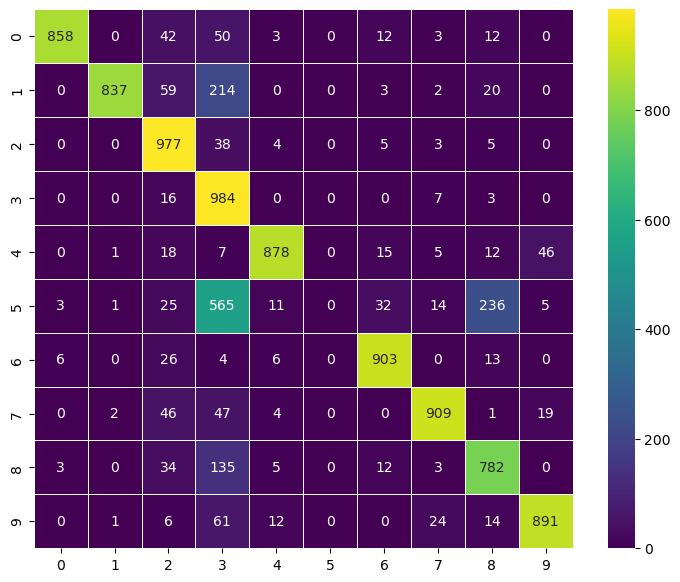

In [25]:
# Plot for no one
model_name = 'no_one'
marvin_reloaded = tf.keras.models.load_model(model_name)

predictions = marvin_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)


confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

#Plot for no five
model_name = 'no_five'
marvin_reloaded = tf.keras.models.load_model(model_name)

predictions = marvin_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)


confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

Not surprisingly, after one number was excluded from the training dataset, the network was not able to learn this specific number, which results in no detections for the number. The number 5 for example was detected are all wrong, mostly as 3 or 8. On the other side, however, the missing number in the training data had also a negative effect on the accuracy of other numbers not related to the wrong detections of the left-out numbers. As in the 2nd round without the number five, number eight was quite often detected as 3, which should not be affected since both numbers are included in the training data. Summing up this shows the importance of complete and unbiased training data. 



## Performance


---

To increase the performance of Marvin 🐞, changes need to be applied to the model of his neuronal network. In this case, my focus will be on a higher accuracy with the same ammount of training epoches, so more accuracy means more performance. To achieve a higher accuracy, i'll add two new layers but also test wether the ReLu or the ELU activation funtcion siutes best to increase the performance as defined above. For the added layers, i choosed Random Flip and Random Rotation. With these Layers added, the neuronal network should be trained better on e.x. tilted numbers. 


In [3]:
# Marvin with ELU activation function
marvin_ELU = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(15)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sampleID = 100
loss_fn(y_train[:1], marvin_ELU(x_train[sampleID-1:sampleID]).numpy()).numpy()

#Marvin fitted with new layers
marvin_layers = tf.keras.models.Sequential([
  tf.keras.layers.RandomFlip(seed=None),
  tf.keras.layers.RandomRotation(factor = 0.5, fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(15)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sampleID = 100
loss_fn(y_train[:1], marvin_layers(x_train[sampleID-1:sampleID]).numpy()).numpy()

#New Marvin network with both chancges applied
marvin_new = tf.keras.models.Sequential([
  tf.keras.layers.RandomFlip(seed=None),
  tf.keras.layers.RandomRotation(factor = 0.5, fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(15)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sampleID = 100
loss_fn(y_train[:1], marvin_new(x_train[sampleID-1:sampleID]).numpy()).numpy()

print ("Marvin with ELU summary")
marvin_ELU.summary()
print ("Marvin with new layers summary")
marvin_layers.summary()
print ("new Marvin summary")
marvin_new.summary()



Marvin with ELU summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 102,415
Trainable params: 102,415
Non-trainable params: 0
_________________________________________________________________
Marvin with new layers summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Sha

In [4]:
# preparing training routine
marvin_ELU.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

marvin_layers.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

marvin_new.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# execute training

marvin_ELU.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)
model_name = "ELU"
marvin_ELU.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, ">")

marvin_layers.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

model_name = "layers"
marvin_layers.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, ">")

marvin_new.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

model_name = "new"
marvin_new.save(model_name, save_format='h5')

print('Success! Marvins results have been saved as: <', model_name, ">")

Epoch 1/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2999 - accuracy: 0.9100 - val_loss: 0.1582 - val_accuracy: 0.9540
Epoch 2/10
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1649 - accuracy: 0.9499 - val_loss: 0.1034 - val_accuracy: 0.9673
Epoch 3/10
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1314 - accuracy: 0.9604 - val_loss: 0.0907 - val_accuracy: 0.9716
Epoch 4/10
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1142 - accuracy: 0.9650 - val_loss: 0.0814 - val_accuracy: 0.9754
Epoch 5/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1025 - accuracy: 0.9684 - val_loss: 0.0892 - val_accuracy: 0.9735
Epoch 6/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.0937 - accuracy: 0.9706 - val_loss: 0.0819 - val_accuracy: 0.9754
Epoch 7/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0859 - accuracy: 0.9725 - val_loss: 0.0818 - val_ac

After looking at the training results, the added layers don't provide the expected results. The results are even worse than expected. This might come from the fact, that the neuronal network is trained on something, that was not used in the tests. On the other hand, the ELU activation function made a slight increase in performance as the accuracy went up from 0.968 to 0.770 and the loss dropped to under 0.1. This effect, however, is quite small, but independent from wether the additional layers are used or not.
<br>
<div>
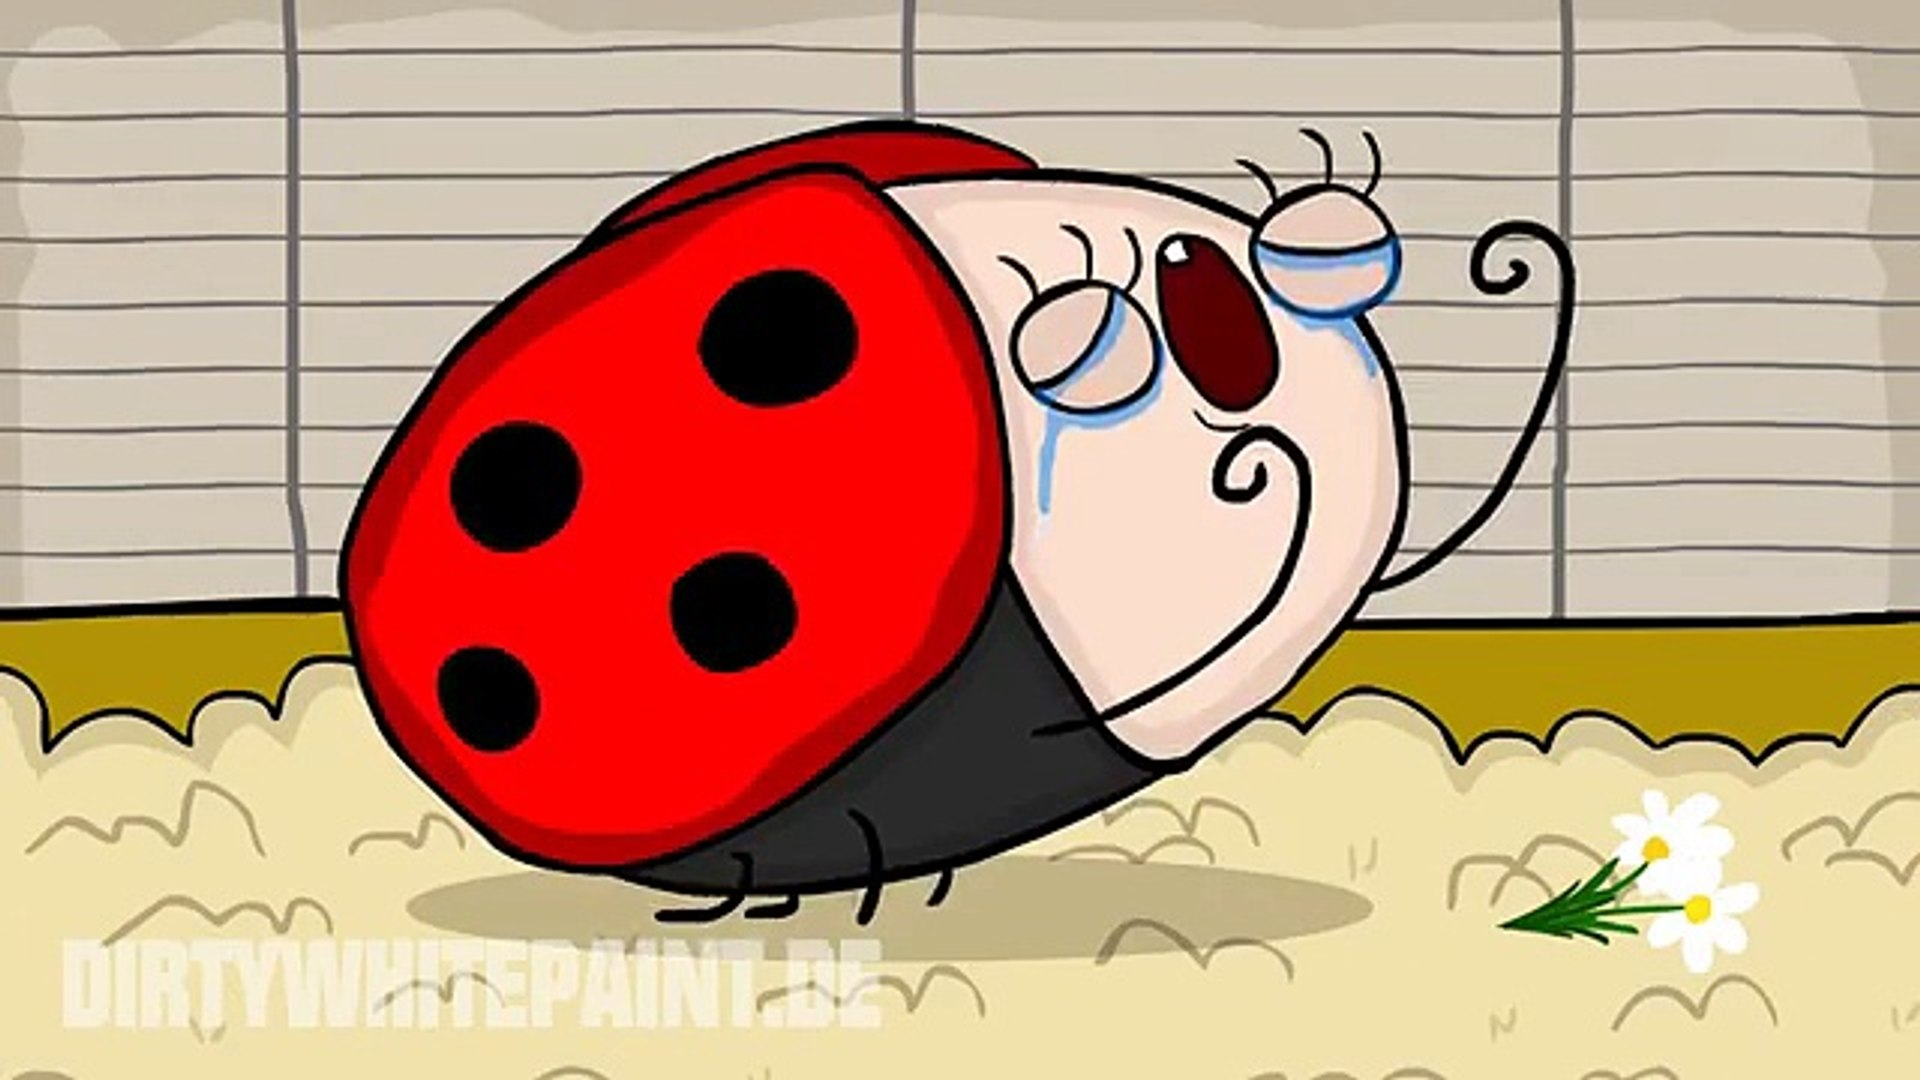
</div>

## Summary of the tutorials

---

### Tutorial 1

In the first tutarial explains the calculation of back probagation. The mainpart however gives an introducktion into the usage of TensorFlow with examples.

### Tutorial 2

The second tutorial is all about transfer learning. With the help of a pretrained model (VGG16) which is imported and prepared, transfer learning is shown by adding layers to an existing model.

### Tutorial 3

Segmentation with U-Net is the main topic of tutrial 3. It explains roughly the used layers and shows how to generate more training and test data. Predicting cell boundaries from an image containing cells is the final task of that with the neuronal network.

## Sources

---

Image 1: https://i.ytimg.com/vi/oKqqRrITlWg/maxresdefault.jpg

Image 2: https://i.ytimg.com/vi/Ugfyu2xrbiE/hqdefault.jpg

Image 3: https://s2.dmcdn.net/v/Ebdwh1N0HVDiSNHHv/x1080

Note: "Ich heiße Marvin" Is a little silly animated series about a ladybug called Marvin, that is why i used the Pictures/Smileys. 

1st Video: https://www.youtube.com/watch?v=oKqqRrITlWg

🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞🐞

---